# Artificial Neural Networks - Multi-Class approach
 
  
### Perform a thorough data analysis and design a neural network to classify eletrical appliances into different mutually exclusive kinds.  
  
   
### DATASET 
Was provided a csv dabatase with 100 appliences, observed 200 times and labeled with their current class.
   
### GOAL 
Create a model able to evaluate the results of transient signals from electrical appliances (signals obtained in a 2s window when the appliance is switched on) in order to classify them into 7 different classes.
  
### ANALYSIS STAGES:
1) Load the data and perform data cleaning (if necessary)<br>
2) Visualize the data for comprehension <br>
3) Transform the labels<br>
4) Prepare the data to be presented to Machine Learning<br>
5) Build the neural network with its respective parameters<br>
6) Test and validate the results<br>
7) Evaluate the use of PCA (Principal Component Analysis)<br>
8) Conclusion<br>


### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## TASK 1 - Load the data and perform data cleaning 

### Acquiring data from the csv file

This data is outdated, it does not necessarily represent the current appliances. But, these studies are still current and continue to use AI features in their solutions

In [2]:
db = pd.read_csv('db.csv')
db

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00,1
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,1
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.70,4.70,2.70,-0.30,0.70,0.70,2.70,1.70,1.70,0.70,...,-0.30,-0.30,-0.30,0.70,-0.30,0.70,-1.30,-1.30,-0.30,5
96,11.55,5.55,2.55,1.55,0.55,1.55,0.55,0.55,-0.45,0.55,...,0.55,-0.45,0.55,-1.45,0.55,-0.45,0.55,-0.45,0.55,6
97,14.35,4.35,1.35,2.35,-0.65,0.35,0.35,1.35,0.35,0.35,...,-0.65,0.35,-0.65,0.35,-1.65,0.35,0.35,0.35,-0.65,6
98,22.70,-5.30,-0.30,-5.30,-1.30,-3.30,-1.30,-3.30,-2.30,-3.30,...,-2.30,1.70,-1.30,1.70,-0.30,0.70,-2.30,0.70,-1.30,7


In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 201 entries, t0 to Classes
dtypes: float64(200), int64(1)
memory usage: 157.2 KB


In [4]:
db.isnull().sum()

t0         0
t1         0
t2         0
t3         0
t4         0
          ..
t196       0
t197       0
t198       0
t199       0
Classes    0
Length: 201, dtype: int64

In [5]:
db[['Classes', 't0']].groupby(['Classes']).count()

,t0
Classes,
1,16
2,22
3,30
4,8
5,16
6,4
7,4


## TASK 2 - Visualize the data for comprehension

### Preparing the data for plotting a histogram


In [6]:
class_number = [1,2,3,4,5,6,7]
classes = []
series = []

for cl in class_number:
    x = pd.DataFrame(db[db['Classes']==cl])
    classes.append(x)
    y = pd.Series(x.values.ravel('F'))
    series.append(y)

**** CLASSE 1 **** | Observations: 16 * 200  | Mean: 4.08  | Median: 0.45 | Standard deviation: 8.16
**** CLASSE 2 **** | Observations: 22 * 200  | Mean: 0.11  | Median: 0.1 | Standard deviation: 1.09
**** CLASSE 3 **** | Observations: 30 * 200  | Mean: 1.7  | Median: 0.75 | Standard deviation: 3.86
**** CLASSE 4 **** | Observations: 8 * 200  | Mean: 1.74  | Median: 1.05 | Standard deviation: 2.57
**** CLASSE 5 **** | Observations: 16 * 200  | Mean: 0.84  | Median: 0.25 | Standard deviation: 3.14
**** CLASSE 6 **** | Observations: 4 * 200  | Mean: 0.16  | Median: 0.35 | Standard deviation: 1.24
**** CLASSE 7 **** | Observations: 4 * 200  | Mean: -1.06  | Median: -1.3 | Standard deviation: 3.25


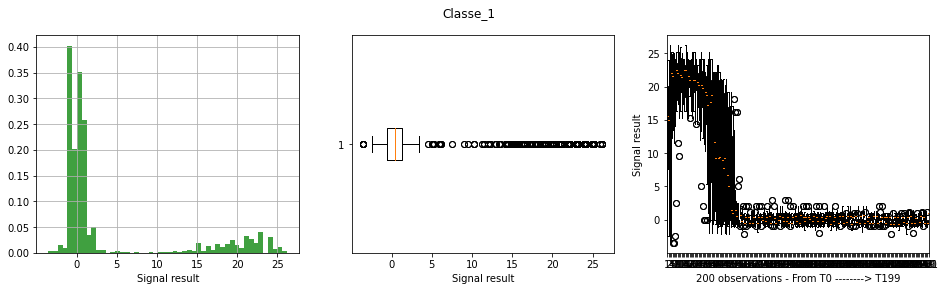

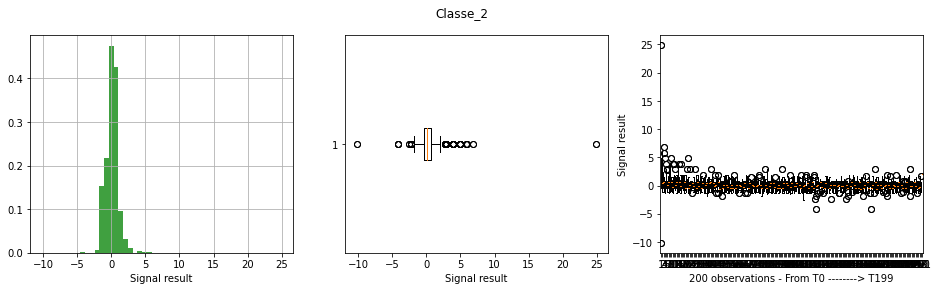

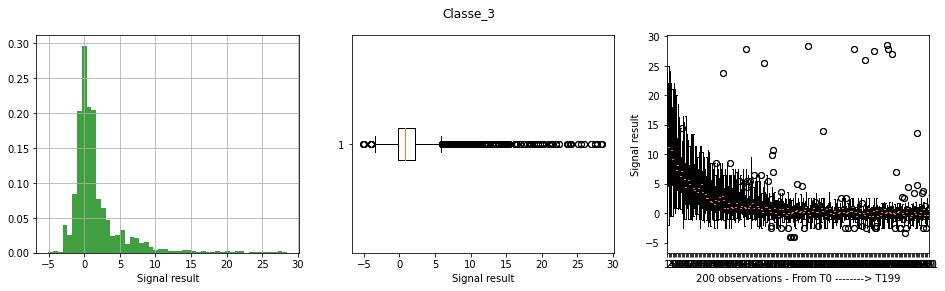

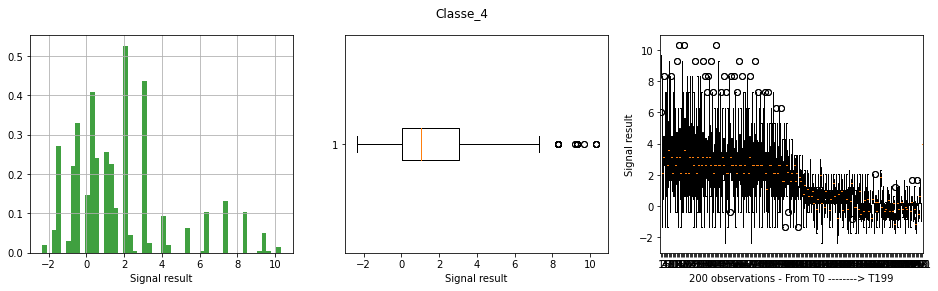

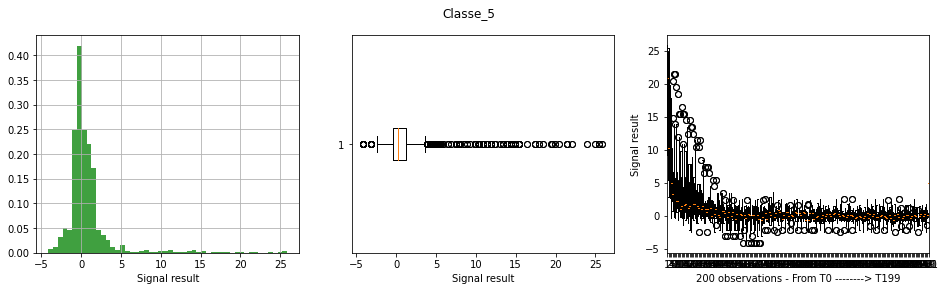

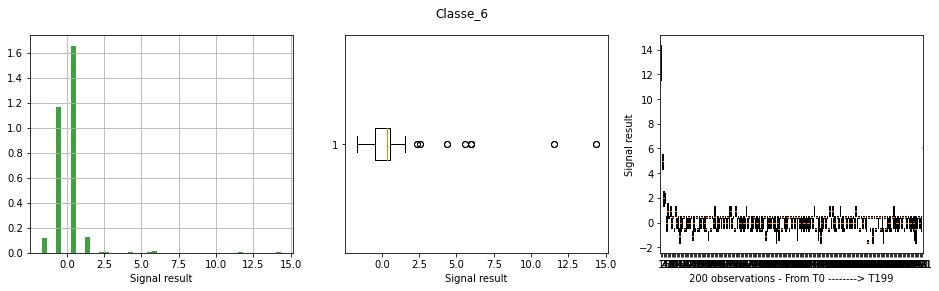

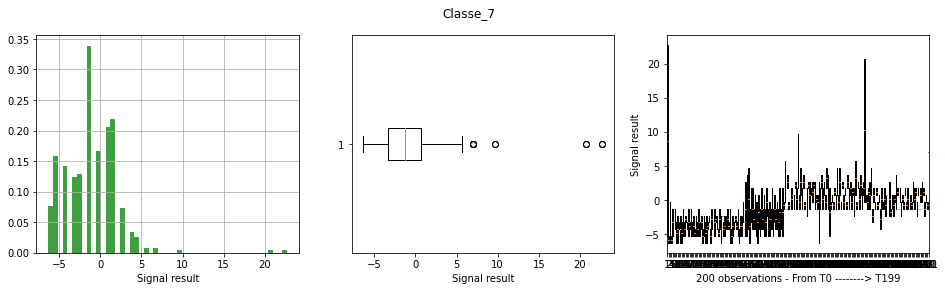

In [7]:
for n in class_number:
    indx = int(n - 1)
    classe = classes[indx]
    serie = series[indx]
    print(f'**** CLASSE {n} **** | Observations: {int(len(serie)/200)} * 200  | Mean: {round(np.mean(serie),2)}  | Median: {round(np.median(serie),2)} | Standard deviation: {round(np.std(serie),2)}')

    fig, ax = plt.subplots(1, 3, figsize = (16,4))

    w, bins, patches = ax[0].hist(serie, 50, density=True, facecolor='g', alpha=0.75)
    ax[0].set_xlabel('Signal result')
    ax[0].grid(True)

    ax[1].boxplot(serie, vert=False)
    ax[1].set_title('')
    ax[1].set_xlabel('Signal result')
    ax[1].set_ylabel('')

    ax[2].boxplot(classe)
    ax[2].set_ylabel('Signal result')
    ax[2].set_xlabel('200 observations - From T0 --------> T199')

    fig.suptitle(f'Classe_{n}')
    fig.show()

## TASK 3 - Transforming the labels

In [8]:
# Transforming classes into dummies
db['Classes'] = 'Class ' + db['Classes'].astype(str)

In [9]:
# Separating x and y, where y gets the dummied columns and X the rest of the dataframe without the dummied columns
y = db[['Classes']]
x = db.drop(['Classes'], axis=1)

## TASK 4 - Preparing the data to be presented to Machine Learning

In [10]:
# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=1, test_size=0.30)

In [11]:
# Standardizing the x-values
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## TASK 5 - Build the neural network with its respective parameters 
### Searching for the best parameters combination (Grid Searching)

In [12]:
parameters = {'hidden_layer_sizes':range(1,40,2), 'activation':('identity', 'logistic', 'tanh', 'relu'), 'solver':('lbfgs', 'sgd', 'adam')}

In [13]:
clf_grid = MLPClassifier(max_iter=300, random_state=1, learning_rate_init = 0.001, validation_fraction= 0.1, early_stopping = True, verbose=True)
gridmodel = GridSearchCV(clf_grid, parameters)
gridmodel.fit(x_train, y_train)
print(gridmodel.best_estimator_)
model = gridmodel.best_estimator_

2.27054121
Validation score: 0.333333
Iteration 6, loss = 2.22716611
Validation score: 0.333333
Iteration 7, loss = 2.18013202
Validation score: 0.333333
Iteration 8, loss = 2.13093502
Validation score: 0.333333
Iteration 9, loss = 2.08011027
Validation score: 0.333333
Iteration 10, loss = 2.02822881
Validation score: 0.333333
Iteration 11, loss = 1.97569828
Validation score: 0.333333
Iteration 12, loss = 1.92303228
Validation score: 0.333333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.44090719
Validation score: 0.166667
Iteration 2, loss = 2.41420436
Validation score: 0.166667
Iteration 3, loss = 2.37684928
Validation score: 0.166667
Iteration 4, loss = 2.33031780
Validation score: 0.166667
Iteration 5, loss = 2.27631494
Validation score: 0.166667
Iteration 6, loss = 2.21684131
Validation score: 0.166667
Iteration 7, loss = 2.15360940
Validation score: 0.166667
Iteration 8, loss = 2.08837970
Validation score: 0.166

In [43]:
model = MLPClassifier(activation='logistic', early_stopping=True, hidden_layer_sizes=(21), learning_rate_init = 0.001, validation_fraction= 0.1, max_iter=300, random_state=1, solver='lbfgs', verbose=True)

In [44]:
model.fit(x_train, y_train)

MLPClassifier(activation='logistic', early_stopping=True, hidden_layer_sizes=21,
              max_iter=300, random_state=1, solver='lbfgs', verbose=True)

In [45]:
model.predict(x_test)

array(['Class 6', 'Class 1', 'Class 3', 'Class 1', 'Class 4', 'Class 1',
       'Class 3', 'Class 2', 'Class 5', 'Class 1', 'Class 2', 'Class 3',
       'Class 2', 'Class 7', 'Class 2', 'Class 2', 'Class 2', 'Class 2',
       'Class 3', 'Class 2', 'Class 3', 'Class 3', 'Class 5', 'Class 2',
       'Class 4', 'Class 5', 'Class 2', 'Class 1', 'Class 2', 'Class 3'],
      dtype='<U7')

## TASK 6  - Test and validate the results

In [46]:
# Model's accuracy test
model.score(x_test,y_test)

0.8666666666666667

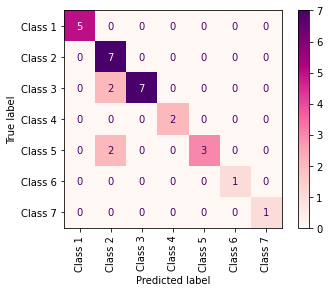

In [47]:
plot_confusion_matrix(model, x_test, y_test, cmap='RdPu',xticks_rotation='vertical' )  
plt.show()

In [48]:
yhat = model.predict(x_test)
print('****** Model Results ******')

print("Accuracy: ", round(metrics.accuracy_score(y_test, yhat),2))
print(metrics.classification_report(y_test, yhat, digits=2))

****** Model Results ******
Accuracy:  0.87
              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00         5
     Class 2       0.64      1.00      0.78         7
     Class 3       1.00      0.78      0.88         9
     Class 4       1.00      1.00      1.00         2
     Class 5       1.00      0.60      0.75         5
     Class 6       1.00      1.00      1.00         1
     Class 7       1.00      1.00      1.00         1

    accuracy                           0.87        30
   macro avg       0.95      0.91      0.91        30
weighted avg       0.92      0.87      0.87        30



## TASK 7 - Evaluate the use of PCA (Principal Component Analysis)

In [49]:
pca = PCA().fit(x_train)

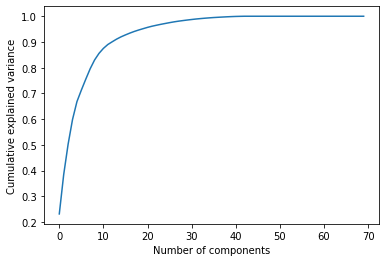

In [50]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [51]:
pca = PCA(n_components=0.87)
pca.fit(x_train)
x_pca_train = pca.transform(x_train)

In [52]:
print(f'Original Model dimensionality: {x_train.shape}')
print(f'PCA Model dimensionality: {x_pca_train.shape}')

Original Model dimensionality: (70, 200)
PCA Model dimensionality: (70, 11)


In [53]:
clf_grid_PCA = MLPClassifier(max_iter=300, random_state=1, learning_rate_init = 0.001, validation_fraction= 0.1, early_stopping = True, verbose=True)
gridmodel_PCA = GridSearchCV(clf_grid_PCA, parameters)
gridmodel_PCA.fit(x_pca_train, y_train)
print(gridmodel_PCA.best_estimator_)
model_PCA = gridmodel_PCA.best_estimator_

7
Iteration 10, loss = 3.14421056
Validation score: 0.166667
Iteration 11, loss = 3.05840664
Validation score: 0.166667
Iteration 12, loss = 2.97411023
Validation score: 0.166667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 3.97185121
Validation score: 0.166667
Iteration 2, loss = 3.88300698
Validation score: 0.166667
Iteration 3, loss = 3.79572477
Validation score: 0.166667
Iteration 4, loss = 3.70989342
Validation score: 0.166667
Iteration 5, loss = 3.62550376
Validation score: 0.166667
Iteration 6, loss = 3.54242503
Validation score: 0.166667
Iteration 7, loss = 3.46070239
Validation score: 0.166667
Iteration 8, loss = 3.38031755
Validation score: 0.166667
Iteration 9, loss = 3.30139705
Validation score: 0.166667
Iteration 10, loss = 3.22388693
Validation score: 0.166667
Iteration 11, loss = 3.14777209
Validation score: 0.166667
Iteration 12, loss = 3.07306090
Validation score: 0.166667
Validation score did not impr

In [54]:
model_PCA = MLPClassifier(activation='logistic', early_stopping=True, hidden_layer_sizes=(17), learning_rate_init = 0.001, validation_fraction= 0.1, max_iter=300, random_state=1, solver='lbfgs', verbose=True)

In [55]:
model_PCA.fit(x_pca_train, y_train)

MLPClassifier(activation='logistic', early_stopping=True, hidden_layer_sizes=17,
              max_iter=300, random_state=1, solver='lbfgs', verbose=True)

In [56]:
# PCA's accuracy test
x_pca_test = pca.transform(x_test)
model_PCA.predict(x_pca_test)
model_PCA.score(x_pca_test,y_test)

0.8666666666666667

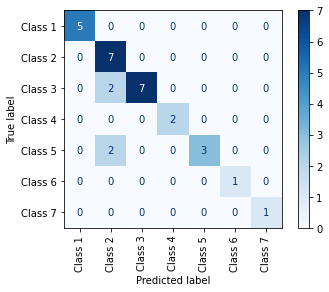

In [57]:

plot_confusion_matrix(model_PCA, x_pca_test, y_test, cmap='Blues',xticks_rotation='vertical' )  
plt.show()

In [58]:
yhat1 = model_PCA.predict(x_pca_test)

print('****** PCA Model Results ******')

print("Accuracy: ", round(metrics.accuracy_score(y_test, yhat1),2))
print(metrics.classification_report(y_test, yhat1, digits=2))

****** PCA Model Results ******
Accuracy:  0.87
              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00         5
     Class 2       0.64      1.00      0.78         7
     Class 3       1.00      0.78      0.88         9
     Class 4       1.00      1.00      1.00         2
     Class 5       1.00      0.60      0.75         5
     Class 6       1.00      1.00      1.00         1
     Class 7       1.00      1.00      1.00         1

    accuracy                           0.87        30
   macro avg       0.95      0.91      0.91        30
weighted avg       0.92      0.87      0.87        30



## TASK 8 - Conclusion

Using gridsearch to look for optimal parameters, an artificial neural network was identified. This model brings accuracy of 0.87 for the desired multi-class classification purpose with the following parameters:



### Original Model parameters
#### activation function ='logistic' | hidden_layer_sizes = (21) | max_iterations = 300 | solver ='lbfgs'


The PCA with 87% reduction in dimensionality from 200 to 11 components brought no loss of model accuracy as shown in the 2 the confusion matrices plotted above.




### PCA Model parameters
#### activation function ='logistic' | hidden_layer_sizes = (17) | max_iterations = 300 | solver ='lbfgs'